## Import library

In [1]:
import numpy as np 
import pandas as pd 
from datetime import datetime
import copy as cp
import calendar
from datetime import timedelta

In [2]:
# 載入所需函示庫
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels
import statsmodels.stats.libqsturng
from matplotlib import pyplot as plt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 150

In [3]:
def strtoint(s):
   #print(s)
    if type(s) != str :
        return s
    ss = s.split(',')
    #print(ss[0])
    temp = 0
    for i in range(len(ss)):
        temp = temp * 1000 + int(ss[i])
#     temp = float(temp / 1000000)
    return temp

## Build a library

In [4]:
transportCnt = dict()

In [5]:
year = ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
month = ['01','02','03','04','05','06','07','08','09','10','11','12']

In [6]:
for i in year:
    for j in month:
        if i == '2022' and j == '04':
            break
        dt_name = '+OÑ_¦¦¦BÑ¦¿t¦+«+¦B¦q¦+¡p_' + i + j+'.csv'
        df = pd.read_csv(dt_name,encoding='big5')
        for k in range(df.shape[0]):
            tmp = df['營運日'][k]
            if(tmp != tmp):
                continue
            tmp = df['營運日'][k].split('/')
            date = datetime(int(tmp[0]) + 1911, int(tmp[1]), int(tmp[2]))
            transport = strtoint(df['總運量'][k])
            transportCnt.setdefault(date,transport)

## Functions

In [7]:
def getHoliday(year, Holiday, df):
    name = []
    y = year
    i = year - 2005
    if(type(df[Holiday][i]) == datetime):
        name.append(df[Holiday][i])
    else:
        start, end = df[Holiday][i].split('-')
        start = start.split('/')
        start = [int(s) for s in start]
        end = end.split('/')
        end = [int(s) for s in end]

        if(start[0] == end[0]):
            name += [datetime(y, start[0], x) for x in np.arange(start[1], end[1] + 1, 1)]
        else:
            lastday = calendar.monthrange(y, start[0])[1]
            if(start[0] == 12):
                name += [datetime(y - 1, start[0], x) for x in np.arange(start[1], lastday + 1, 1)]
            else:
                name += [datetime(y, start[0], x) for x in np.arange(start[1], lastday + 1, 1)]
            name += [datetime(y, end[0], x) for x in np.arange(1, end[1] + 1, 1)]
    return name

In [8]:
def getHolidayLength(date):
    holiday, column, i = isHoliday([date.year], h_columns, date)
    if(holiday):
        return df[column][i]
    elif(date.isoweekday() == 6 or date.isoweekday() == 7):
        return 2
    else:
        return 0

In [9]:
def isHoliday(years, columns, date):
    for column in columns:
        for year in years:
            if(date in holiday_rec[column][year - 2005]):
                return True, column, year - 2005
    return False, -1, -1

In [10]:
def holiday_type(date):
    y = date.year
    m = date.month
    d = date.day
    traditional = ['春節', '端午', '中秋']
    national = ['雙十', '二二八', '元旦', '清明', '勞動']
    years = np.arange(2015, 2023, 1)
    if(isTyphoon(date) or ((m == 12) and (d == 31)) or isHoliday(years, ['除夕'], date)[0]):
        return
    elif(isHoliday(years, traditional, date)[0]):
        return 'Traditional'
    elif(isHoliday(years, national, date)[0]):
        return 'National'
    elif((m == 12 and d == 25) or (m == 2 and d == 14) or (m == 10 and d == 31)):
        return 'Western'
#     elif((m == 8 and d == 8) or (m == 5 and d <= 14 and d >= 8 and date.isoweekday() == 7)):
#         return 'Fother'
    elif(date.isoweekday() >= 5):
        return 'Weekend'
    else:
        return 'Weekday'

In [11]:
def FBE(holidays_to_check, date):
#     traditional = ['春節', '端午', '中秋']
    years = np.arange(2015, 2020, 1)
    ish, col, i = isHoliday(years, holidays_to_check, date)
    if(ish):
        length = getHolidayLength(date)
        df_h = holiday_rec[col][i]
        firstday = df_h[0]
        lastday = df_h[len(df_h) - 1]
        if(date == firstday or date == firstday - timedelta(days = 1)):
            return '1'
        elif(date == lastday):
            return '3'
        else:
            return '2'
    if(holiday_type(date) == 'Weekend'):
        if(date.isoweekday() == 5):
            return '1'
        elif(date.isoweekday() == 6):
            return '2'
        elif(date.isoweekday() == 7):
            return '3'

In [12]:
def season(date):
    s = []
    start = 3
    for i in range( 4 ) : 
        s.append( [])
        for j in range( 3 ) :
            s[i].append( start ) 
            start = ( start % 12 ) + 1
    m = date.month
    if(m in s[0]):
        return 'Spring'
    elif(m in s[1]):
        return 'Summer'
    elif(m in s[2]):
        return 'Fall'
    else:
        return 'Winter'

In [13]:
def new_holiday_type(date):
    holidays = [['除夕'], ['春節'],['端午'],['中秋'], ['雙十'],['二二八'],['元旦'],['清明']]
    y = date.year
    m = date.month
    d = date.day
    years = np.arange(2015, 2023, 1)
    if(((m == 12) and (d == 31))):
        return 
    elif(isTyphoon(date)):
        return
    for i, h in enumerate(holidays):
        if(isHoliday(years, h, date)[0]):
            return 
    if((m == 12 and d == 25) or (m == 2 and d == 14) or (m == 10 and d == 31)):
        return '西洋'
#     elif((m == 8 and d == 8) or (m == 5 and d <= 14 and d >= 8 and date.isoweekday() == 7)):
#         return 'Fother'
    if(date.isoweekday() >= 5):
        return '假日'
    return '平日'


In [14]:
def isTyphoon(date):
    if(date in list(df_typhoon['日期'])):
        return True
    return False

## Global

In [15]:
df = pd.read_excel('../歷年連假天數.xlsx')
df = df.drop(index = 18)
df_typhoon = pd.read_excel('../Typhoon_date.xlsx')
columns = ['除夕', '春節.1', '端午.1', '中秋.1', '雙十.1', '二二八.1', '元旦.1', '清明.1', '勞動.1']
years = np.arange(2005, 2023, 1)
holiday_rec = []
for column in columns:
    tmp = []
    for year in years:
        tmp.append(getHoliday(year, column, df))
    holiday_rec.append(tmp)
holiday_rec = pd.DataFrame(holiday_rec).T
h_columns = ['除夕','春節', '端午', '中秋', '雙十', '二二八', '元旦', '清明', '勞動']
holiday_rec.columns = h_columns

------

In [16]:
df2 = pd.DataFrame(list(transportCnt.items()), columns=['Date', 'TPcnt'])
df2['Year'] = [day.year for day in df2['Date']]
df2['Month'] = [day.month for day in df2['Date']]
df2['Day'] = [day.isoweekday() for day in df2['Date']]
df2['Holiday_Type'] = [new_holiday_type(day) for day in df2['Date']]
df2['Typhoon'] = [isTyphoon(day) for day in df2['Date']]
df2 = df2.drop(df2[df2['Holiday_Type'] == '除夕'].index)
df2 = df2.drop(df2[df2['Holiday_Type'] == '跨年'].index)
df2 = df2.drop(df2[df2['Typhoon'] == True].index)
df2 = df2.drop(df2[df2['Year'] >= 2020].index)
df2

,Date,TPcnt,Year,Month,Day,Holiday_Type,Typhoon
0,2015-01-01,1796950,2015,1,4,None,False
1,2015-01-02,1830184,2015,1,5,None,False
2,2015-01-03,1802037,2015,1,6,None,False
3,2015-01-04,1585463,2015,1,7,None,False
4,2015-01-05,1915326,2015,1,1,平日,False
...,...,...,...,...,...,...,...
1821,2019-12-27,2658619,2019,12,5,假日,False
1822,2019-12-28,2298630,2019,12,6,假日,False
1823,2019-12-29,1777124,2019,12,7,假日,False
1824,2019-12-30,2469682,2019,12,1,平日,False


In [17]:
df3 = df2.copy()
df3 = df3.dropna().reset_index(drop = True)
df3['Western'] = df3['Holiday_Type'] == '西洋'
df3['Holiday'] = df3['Day'] >= 5
# df3 = df3.drop(df3[df3['Month'] == 12].index)
df3['Mix'] = [str(df3['Western'][i]) + "_" + str(df3['Holiday'][i]) for i in range(df3.shape[0])]
df3

,Date,TPcnt,Year,Month,Day,Holiday_Type,Typhoon,Western,Holiday,Mix
0,2015-01-05,1915326,2015,1,1,平日,False,False,False,False_False
1,2015-01-06,1945591,2015,1,2,平日,False,False,False,False_False
2,2015-01-07,1965860,2015,1,3,平日,False,False,False,False_False
3,2015-01-08,1987913,2015,1,4,平日,False,False,False,False_False
4,2015-01-09,2163929,2015,1,5,假日,False,False,True,False_True
...,...,...,...,...,...,...,...,...,...,...
1624,2019-12-26,2466352,2019,12,4,平日,False,False,False,False_False
1625,2019-12-27,2658619,2019,12,5,假日,False,False,True,False_True
1626,2019-12-28,2298630,2019,12,6,假日,False,False,True,False_True
1627,2019-12-29,1777124,2019,12,7,假日,False,False,True,False_True


In [18]:
a = df3['Day'] == 5
b = df3['Day'] == 6
c = a | b

In [19]:
results = smf.ols('TPcnt ~ C(Holiday) + C(Western) + C(Holiday):C(Western)', data=df3).fit()
# results.summary()
aov = sms.anova_lm(results, typ=2)
aov

,sum_sq,df,F,PR(>F)
C(Holiday),3.119757e+12,1.0,77.895743,2.747539e-18
C(Western),1.004909e+11,1.0,2.509110,1.133844e-01
C(Holiday):C(Western),3.794839e+08,1.0,0.009475,9.224681e-01
Residual,6.508192e+13,1625.0,NaN,NaN


In [20]:
stat, p = stats.shapiro(results.resid)
print('Statistics=%.4f, p=%.4f' % (stat, p))

Statistics=0.9860, p=0.0000


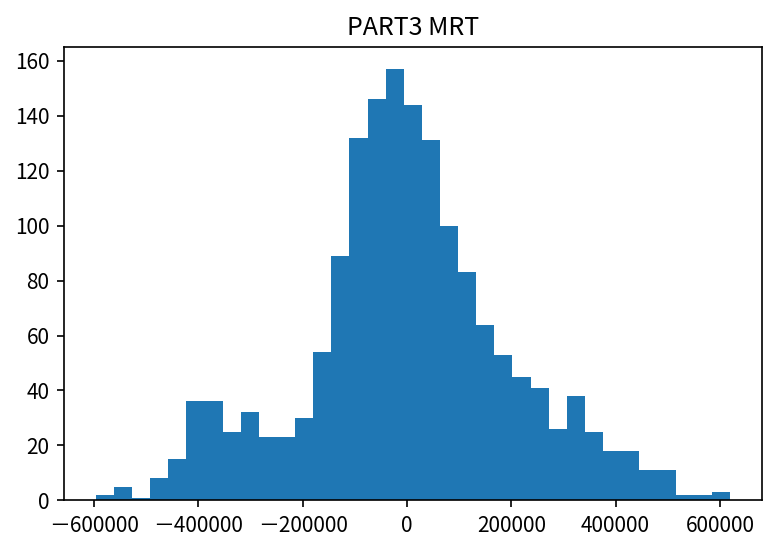

In [21]:
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

_ = plt.hist(results.resid, bins = "auto")
plt.title('PART3 MRT')
plt.savefig( 'images/MRT_PART3_ANOVA_hist.jpg' )
plt.show()

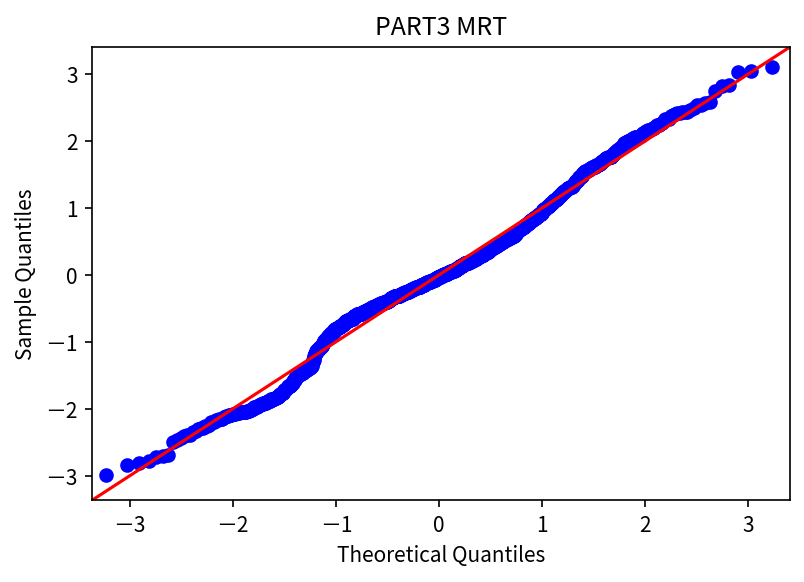

In [22]:
fig = sm.qqplot(results.resid, stats.norm, fit=True, line='45')
plt.title('PART3 MRT')
plt.ylabel('Sample Quantiles')
plt.xlabel('Theoretical Quantiles')
plt.savefig( 'images/MRT_PART3_ANOVA_qqplot.jpg')
plt.show()

In [23]:
trCnt = [[]for i in range(4)]
trCnt[0] = df3[df3['Mix'] == 'True_True']['TPcnt']
trCnt[1] = df3[df3['Mix'] == 'False_True']['TPcnt']
trCnt[2] = df3[df3['Mix'] == 'True_False']['TPcnt']
trCnt[3] = df3[df3['Mix'] == 'False_False']['TPcnt']

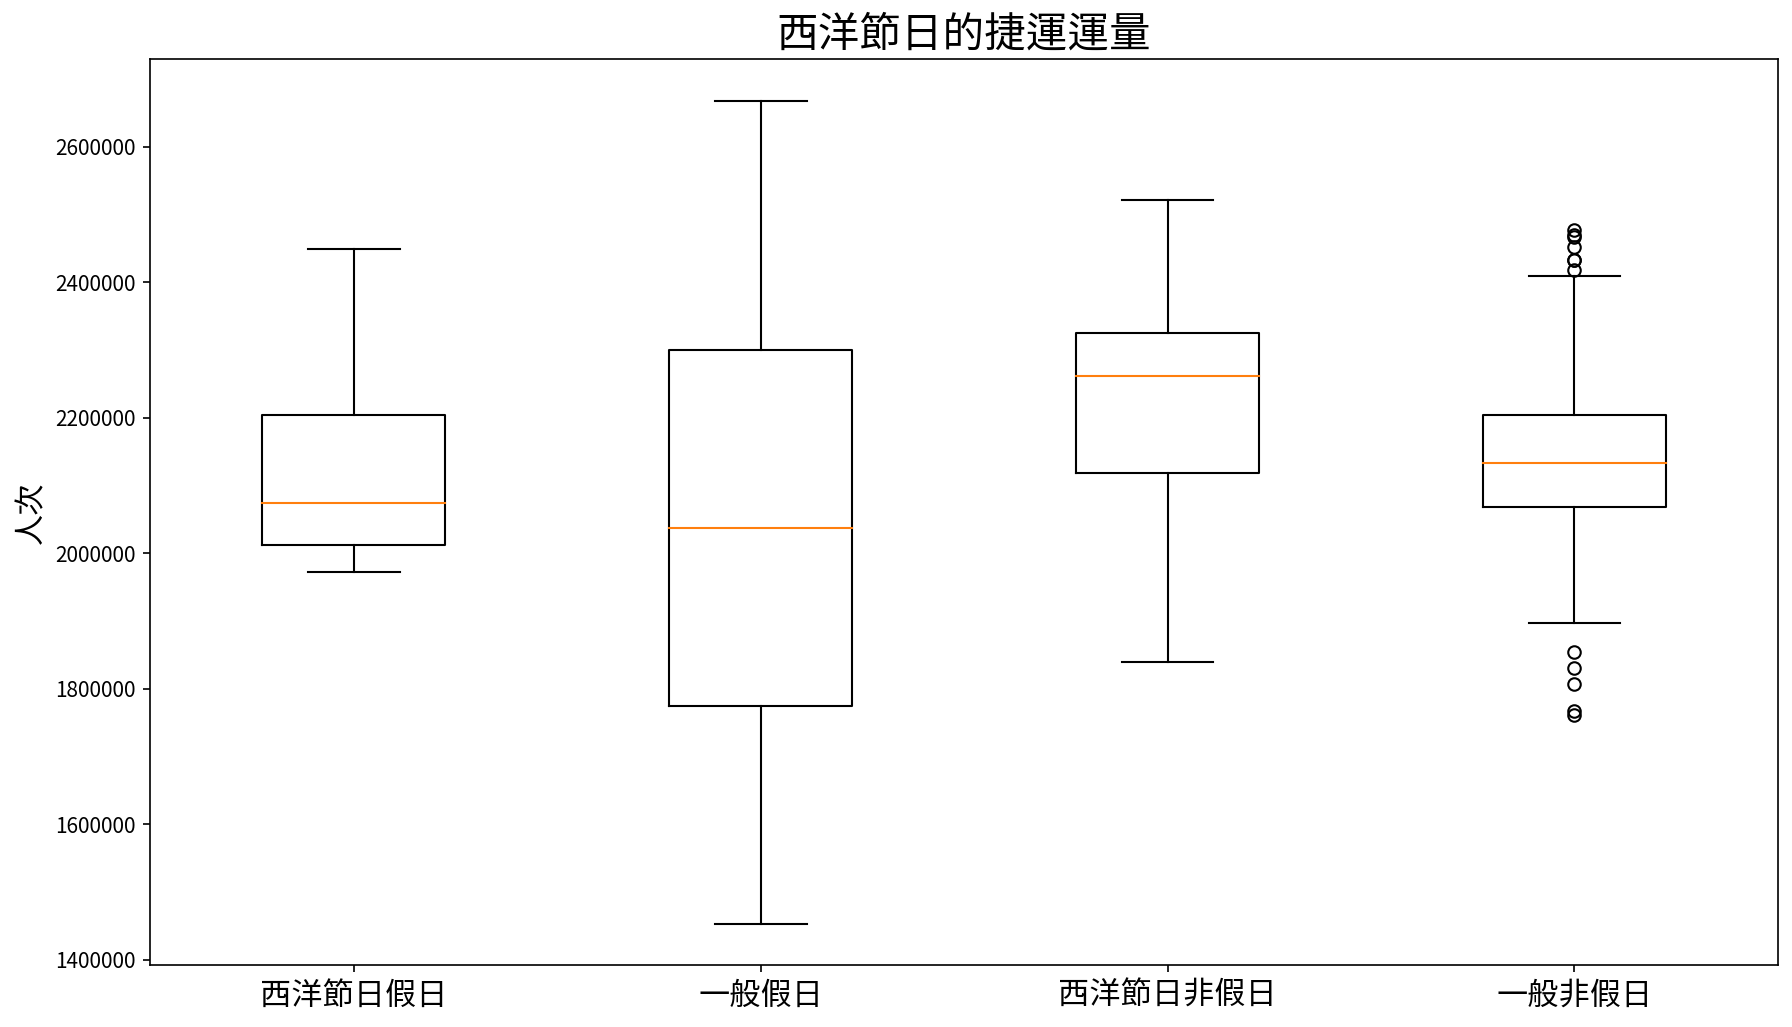

In [24]:
fig, ax = plt.subplots( figsize = ( 14, 8 ) )

# for i in range(4):
plt.boxplot(trCnt )
plt.xticks( range( 1, 5 ), ['西洋節日假日', '一般假日', '西洋節日非假日', '一般非假日'], fontsize = 15 )
plt.title( '西洋節日的捷運運量', fontsize = 20 )
plt.ylabel( '人次', fontsize = 15 ) 
ax.ticklabel_format(style='sci', scilimits=(-1,100), axis='y')
plt.savefig( 'images/MRT_PART3_compare.jpg' )
plt.show()

In [25]:
results = smf.ols('TPcnt ~ C(Mix)', data=df3).fit()
# results.summary()
aov = sms.anova_lm(results, typ=2)
aov

,sum_sq,df,F,PR(>F)
C(Mix),3.249495e+12,3.0,27.045035,4.559023e-17
Residual,6.508192e+13,1625.0,NaN,NaN


In [26]:
stat, p = stats.shapiro(results.resid)
print('Statistics=%.4f, p=%.4f' % (stat, p))

Statistics=0.9860, p=0.0000


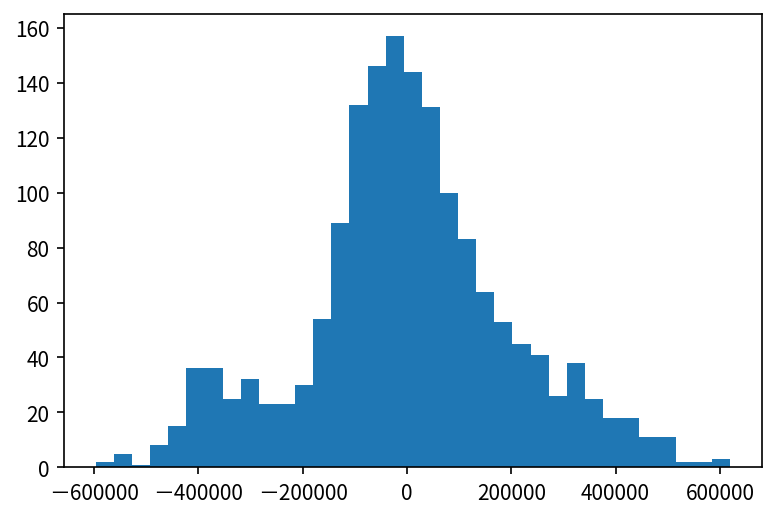

In [27]:
_ = plt.hist(results.resid, bins = "auto")

In [28]:
mc = smm.MultiComparison(df3['TPcnt'], df3['Mix'])
print(mc.tukeyhsd().summary())

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
   group1     group2     meandiff  p-adj     lower        upper    reject
-------------------------------------------------------------------------
False_False False_True -88985.5161  0.001 -114984.2066 -62986.8255   True
False_False True_False  81798.2237 0.5636  -81810.7861 245407.2335  False
False_False  True_True   4379.3737    0.9 -253496.1228 262254.8701  False
 False_True True_False 170783.7398 0.0375    6820.8112 334746.6683   True
 False_True  True_True  93364.8898 0.7631 -164735.2953 351465.0748  False
 True_False  True_True   -77418.85    0.9 -381898.2117 227060.5117  False
-------------------------------------------------------------------------


D:\New folder\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


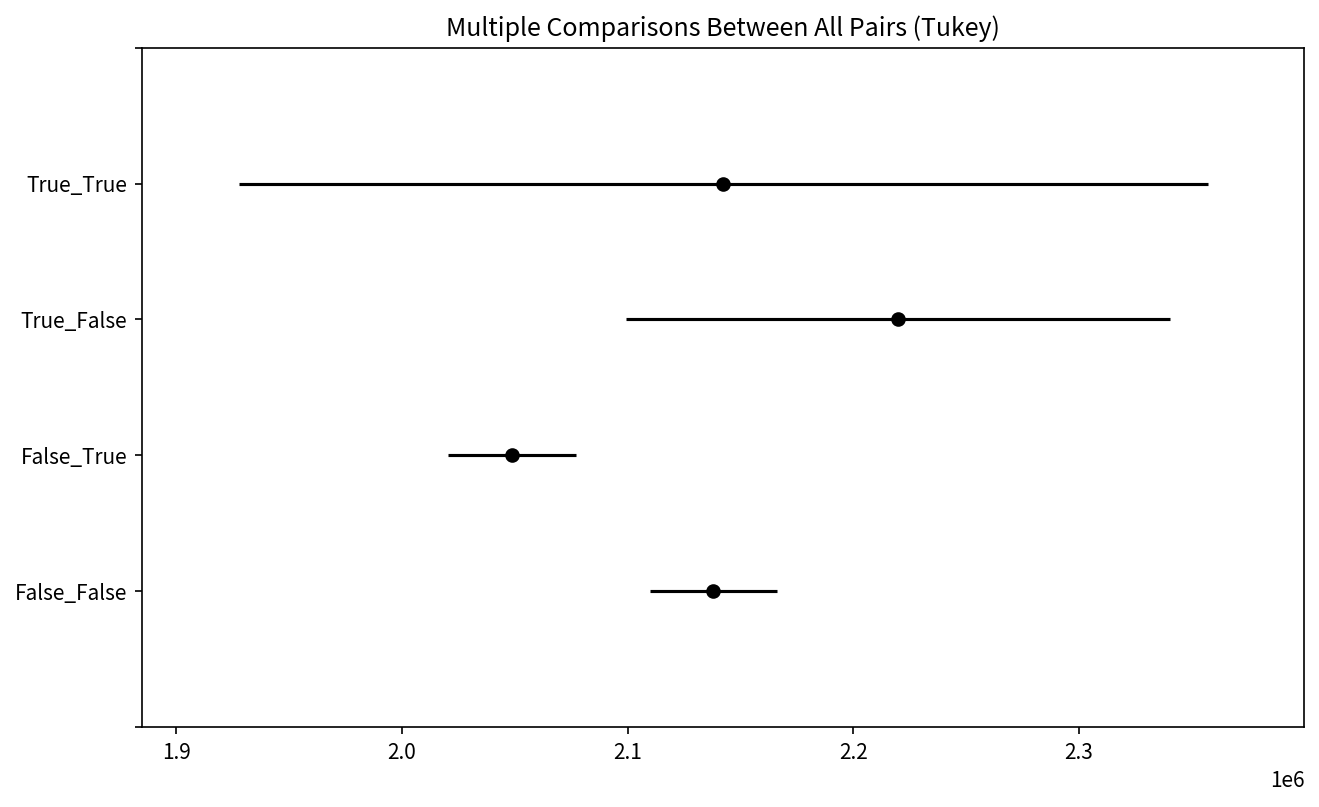

In [29]:
_ = mc.tukeyhsd().plot_simultaneous()

In [30]:
alldata = np.array([])
for day in trCnt:
    alldata = np.concatenate([alldata, day])
alldata.sort()
tmpdf = pd.DataFrame(({'value': alldata}))
tmpdf['rank'] = tmpdf.index + 1
value2rank = tmpdf.groupby('value').mean().reset_index()
value2rank

,value,rank
0,1452237.0,1.0
1,1481143.0,2.0
2,1489059.0,3.0
3,1494354.0,4.0
4,1504619.0,5.0
...,...,...
1623,2612924.0,1625.0
1624,2616701.0,1626.0
1625,2655283.0,1627.0
1626,2658619.0,1628.0


In [37]:
T = []
for i, day in enumerate(trCnt):
    samp = pd.DataFrame({'value': day})
    samp = pd.merge(samp, value2rank)
    T.append(samp['rank'].sum())
    print(f"T%s = {T[i]}"%(i))

T0 = 3168.0
T1 = 487880.0
T2 = 10932.0
T3 = 825655.0


In [32]:
# labels = set(df3["Mix"])
# T = []
# n = []
# for i, label in enumerate(labels):
#     day = df3[df3['Mix'] == label]['TPcnt'].reset_index(drop = True)
#     samp = pd.DataFrame({'value': day})
#     samp = pd.merge(samp, value2rank)
#     n.append(samp.shape[0])
# #     T.append(samp['rank'].sum())
#     print(f"T%s = {T[i]}"%(i))

T0 = 825655.0
T1 = 487880.0
T2 = 10932.0
T3 = 3168.0


In [33]:
n

[946, 669, 10, 4]

In [39]:
# n = []
columns = ['西洋節日假日', '一般假日', '西洋節日非假日', '一般非假日']
# for column in columns:
#     n.append(df1[column].dropna().shape[0])
# print(n)
T = np.array(T)
n = np.array(n)
x = T ** 2 / n
k = 4
n = n.sum()
H = 12 / (n * (n + 1)) * (x.sum()) - 3 * (n + 1)
pvalue = stats.chi2.cdf(H, k - 1)

print(f"H = {H}")
print(f"p-value = {pvalue}")

H = -2338.036589820497
p-value = 0.0
